# Week 8


## Evaluation for Classification

![Indexing](load_d.png)

Data Set Information:

We used preprocessing programs made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.


https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

![Indexing](load_digit.png)

### Preamble

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
X[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [4]:
X.shape

(1797, 64)

In [5]:
(dataset.target.shape)

(1797,)

In [6]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [7]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
# Radial Basis Function
# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [9]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [11]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Confusion matrices

#### Binary (two-class) confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [15]:
X_test.shape

(450, 64)

In [13]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[362  45]
 [ 39   4]]


In [14]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


/Users/ramzisaouma/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [18]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [19]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.89      0.90       407
           1       0.08      0.09      0.09        43

    accuracy                           0.81       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.82      0.81      0.82       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

### Regression evaluation metrics

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


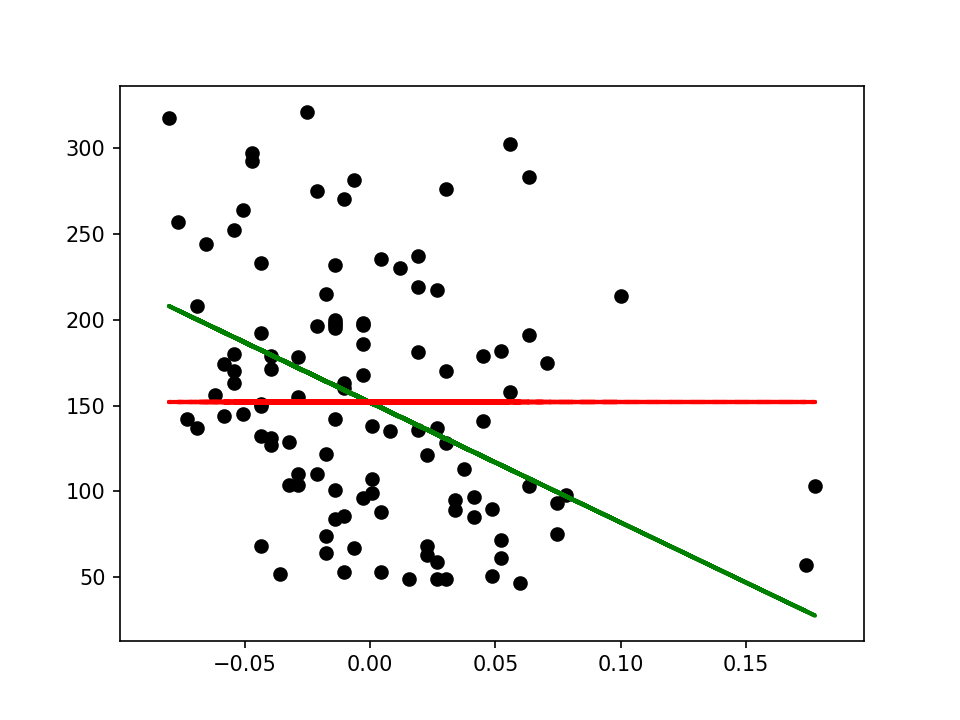

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()